In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv(r"C:\Users\dell\Desktop\Full cleand fifa players 2.csv")  # Replace with your dataset file path

In [ ]:
# Selecting numerical features for clustering, excluding any identifiers
features_for_clustering = [col for col in df.columns if df[col].dtype in [np.int64, np.float64] and col not in ['Player ID']]

In [ ]:
# Preprocessing: Scaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[features_for_clustering])

In [ ]:
# Determine the optimal number of clusters using silhouette scores
silhouette_scores = []
K_range = range(2, 11)  # Example range from 2 to 10 clusters

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

D:\jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._

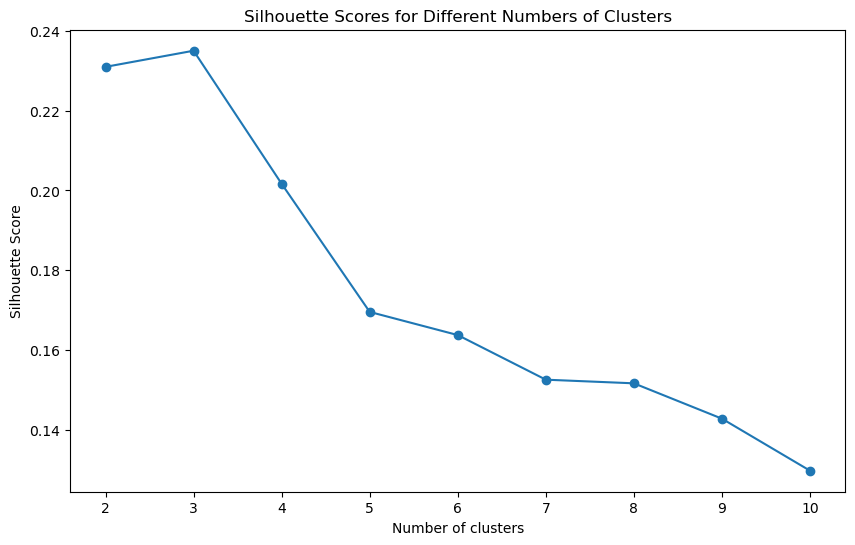

In [ ]:
# Plot silhouette scores to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Choose the optimal number of clusters
optimal_K = K_range[np.argmax(silhouette_scores)]

In [ ]:
# Assuming the silhouette score analysis has been performed and optimal_K has been determined

print("The optimal number of clusters used is:", optimal_K)

The optimal number of clusters used is: 3


In [ ]:
# Applying K-Means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_K, random_state=42)
kmeans_optimal.fit(X_scaled)

# Displaying the number of instances in each cluster
print("Cluster distribution:")
print(pd.Series(kmeans_optimal.labels_).value_counts())


D:\jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster distribution:
0    5010
2    4502
1    4166
Name: count, dtype: int64


In [ ]:
# Display the first few entries of the 'Cluster_Labels' column
print(df['Cluster_Labels'].head())

0    0
1    0
2    1
3    1
4    0
Name: Cluster_Labels, dtype: int32


In [ ]:



# Display player names with their corresponding cluster labels and characteristics
player_names_with_clusters = df[['Name', 'Cluster_Labels']]

# If you want to display the player characteristics as well, select those columns too
# For example, if you used features like 'Pace', 'Shooting', 'Passing' for clustering:
characteristics = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending']
player_info_with_clusters = df[['Name'] + characteristics + ['Cluster_Labels']]

# Now print the information
print(player_info_with_clusters.head(30))

               Name  Pace  Shooting  Passing  Dribbling  Defending  \
0    Aakash Sangwan    68        36       47         50         52   
1        Aapo Halme    47        21       45         55         63   
2     Aaren D'Silva    51        52       39         51         17   
3        Aaron Akal    63        55       39         55         19   
4    Aaron Basenach    73        46       50         56         52   
5      Aaron Bolger    56        45       58         63         53   
6   Aaron Boupendza    86        78       67         80         27   
7      Aaron Calver    63        33       50         51         61   
8     Aaron Collins    81        68       65         71         35   
9    Aaron Connolly    75        69       55         71         26   
10  Aaron Cresswell    58        60       75         75         77   
11      Aaron Drewe    66        30       45         52         51   
12     Aaron Drinan    69        59       49         61         32   
13     Aaron Greene 